170498071/170498071 [==============================] - 11s 0us/step


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/

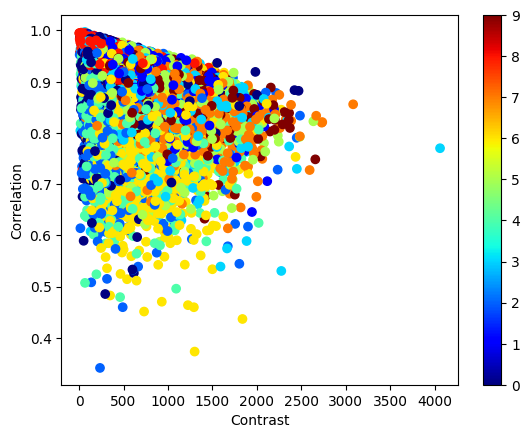

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import concurrent.futures
from sklearn.model_selection import train_test_split
from skimage import io, color, feature
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert the images to grayscale and normalize the pixel values
X_train_gray = (color.rgb2gray(X_train) * 255).astype(np.uint8)
X_test_gray = (color.rgb2gray(X_test) * 255).astype(np.uint8)

# Define a function to calculate the GLCM features
def glcm_features(img):
    glcm = feature.greycomatrix(img, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)
    contrast = feature.greycoprops(glcm, 'contrast')[0][0]
    correlation = feature.greycoprops(glcm, 'correlation')[0][0]
    return contrast, correlation

# Calculate the GLCM features using multi-threading
with concurrent.futures.ThreadPoolExecutor() as executor:
    X_train_glcm = np.array(list(executor.map(glcm_features, X_train_gray)))
    X_test_glcm = np.array(list(executor.map(glcm_features, X_test_gray)))

# Split the data into training and validation sets
X_train_glcm, X_val_glcm, y_train, y_val = train_test_split(X_train_glcm, y_train, test_size=0.2, random_state=42)

# Generate a scatter plot of the contrast vs. correlation features
plt.scatter(X_train_glcm[:,0], X_train_glcm[:,1], c=y_train.ravel(), cmap='jet')
plt.xlabel('Contrast')
plt.ylabel('Correlation')
plt.colorbar()
plt.show()
